In [1]:
import os
import re

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(columns=['c', 'alpha', 'beta', 'gamma', 'delta', 'theta', 'merge', 'evolv', 'logreg', 'forest'])

In [3]:
dirname = 'logs'
for entry in os.listdir(dirname):
    if entry == '.DS_Store': continue
    params_match = re.search(r'tem_metrics_([\d.]+)_([\d.]+)_([\d.]+)_([\d.]+)_([\d.]+)_([\d.]+)_([\d.]+)_([\d.]+)', entry).group
    params = [float(params_match(i)) for i in range(1, 9)]
    with open(f'{dirname}/{entry}/results.log', 'r') as fp:
        text = fp.readlines()[1]
        log_reg = re.search(r'Logistic Regression Mean Accuracy: ([\d.]+)', text).group(1)
        forest = re.search(r'Random Forest Mean Accuracy: ([\d.]+)', text).group(1)
        df.loc[len(df)] = [*params, float(log_reg), float(forest)]
df

,c,alpha,beta,gamma,delta,theta,merge,evolv,logreg,forest
0,0.5,0.75,0.25,0.25,1.50,0.4625,0.95,0.3000,0.540,0.704
1,0.5,0.25,0.75,0.50,1.25,0.3000,0.30,0.3000,0.490,0.653
2,0.7,0.00,0.00,0.00,1.00,0.9500,0.95,0.9500,0.585,0.643
3,0.5,0.75,0.25,0.25,1.25,0.3000,0.30,0.3000,0.506,0.706
4,0.5,0.50,0.50,0.75,0.90,0.3000,0.30,0.7875,0.503,0.687
...,...,...,...,...,...,...,...,...,...,...
1900,0.1,0.00,0.00,0.00,1.00,0.9500,0.95,0.7875,0.603,0.655
1901,0.5,0.25,1.00,0.25,1.50,0.4625,0.95,0.3000,0.502,0.652
1902,0.5,0.75,1.00,0.50,0.90,0.3000,0.30,0.3000,0.494,0.636
1903,0.5,0.50,0.25,0.25,0.90,0.3000,0.30,0.4625,0.481,0.682


<Axes: ylabel='Density'>

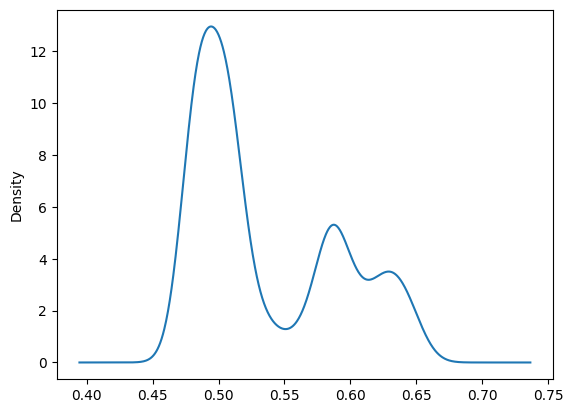

In [4]:
df['logreg'].plot(kind='density')

<Axes: ylabel='Density'>

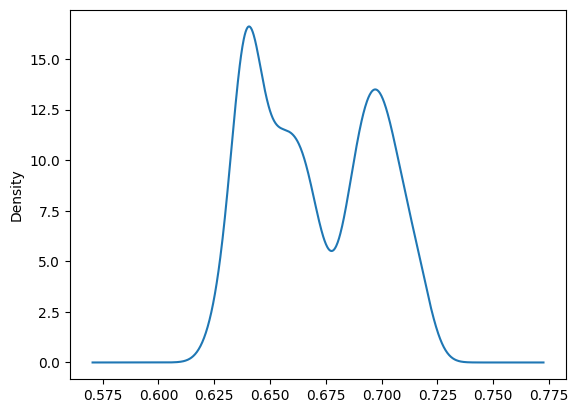

In [5]:
df['forest'].plot(kind='density')

In [6]:
n = 20
df.nlargest(n, columns=['forest'])

,c,alpha,beta,gamma,delta,theta,merge,evolv,logreg,forest
199,0.3,0.00,0.00,0.00,1.00,0.3,0.3,0.3000,0.632,0.722
1869,0.5,0.00,0.00,0.00,1.00,0.3,0.3,0.3000,0.639,0.722
288,0.5,1.00,0.25,1.00,1.50,0.3,0.3,0.7875,0.534,0.721
358,0.5,1.00,0.25,1.00,0.90,0.3,0.3,0.7875,0.534,0.721
829,0.5,1.00,0.25,1.00,1.25,0.3,0.3,0.7875,0.534,0.721
985,0.5,1.00,0.25,1.00,1.75,0.3,0.3,0.7875,0.534,0.721
15,0.5,0.75,0.25,1.00,1.75,0.3,0.3,0.7875,0.513,0.720
222,0.5,1.00,0.25,0.75,1.75,0.3,0.3,0.7875,0.555,0.720
874,0.5,0.50,0.25,1.00,0.90,0.3,0.3,0.7875,0.504,0.720
885,0.5,0.75,0.25,1.00,0.90,0.3,0.3,0.7875,0.513,0.720


In [7]:
df.nlargest(n, columns=['logreg'])

,c,alpha,beta,gamma,delta,theta,merge,evolv,logreg,forest
765,0.5,0.0,0.00,0.00,1.00,0.9500,0.9500,0.30,0.651,0.708
1215,0.5,0.0,0.00,0.00,1.00,0.4625,0.6250,0.30,0.651,0.709
1377,0.5,0.0,0.00,0.00,1.00,0.6250,0.9500,0.30,0.651,0.709
415,0.5,0.0,0.00,0.00,1.00,0.4625,0.4625,0.30,0.650,0.709
470,0.5,1.0,0.25,0.75,1.25,0.3000,0.3000,0.95,0.650,0.704
480,0.5,0.0,0.00,0.00,1.00,0.9500,0.6250,0.30,0.650,0.709
766,0.5,0.0,0.00,0.00,1.00,0.4625,0.7875,0.30,0.650,0.710
809,0.5,0.0,0.00,0.00,1.00,0.7875,0.9500,0.30,0.650,0.710
927,0.5,0.0,0.00,0.00,1.00,0.7875,0.7875,0.30,0.650,0.709
989,0.5,0.0,0.00,0.00,1.00,0.9500,0.4625,0.30,0.650,0.707
